# K-Means clustering model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [2]:
# Load California housing dataset
california = fetch_california_housing()
data = pd.DataFrame(california.data, columns=california.feature_names)
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
# Standardizing the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


In [5]:
# Determine optimal K using Elbow Method
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)


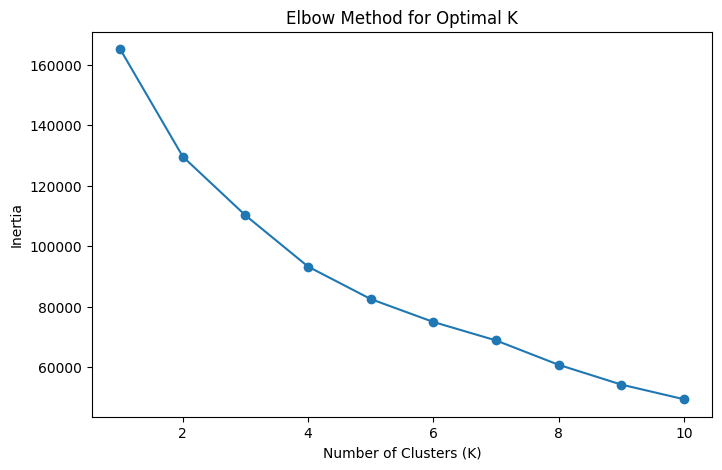

In [6]:
# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [7]:
# Apply K-Means with the chosen K (e.g., K=4 based on elbow)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_data)

In [8]:
# Add cluster labels to the dataframe
data['Cluster'] = clusters

In [9]:
# Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

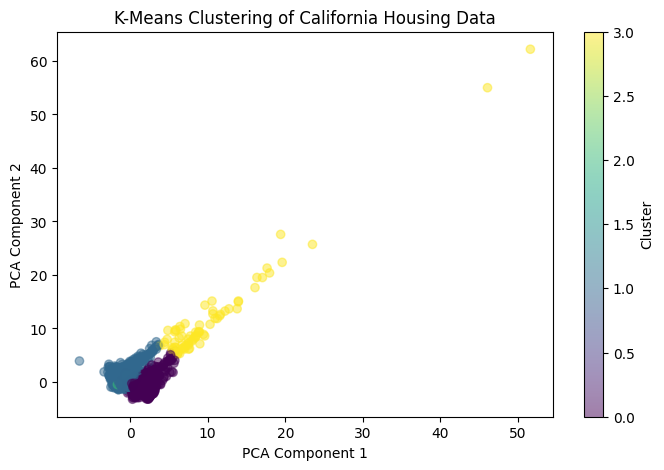

In [10]:
# Plot clusters
plt.figure(figsize=(8, 5))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering of California Housing Data')
plt.colorbar(label="Cluster")
plt.show()

# Hierarchical Clustering

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [13]:
# Load the California housing dataset
california = fetch_california_housing()
data = pd.DataFrame(california.data, columns=california.feature_names)
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [14]:
# Standardizing the dataset
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

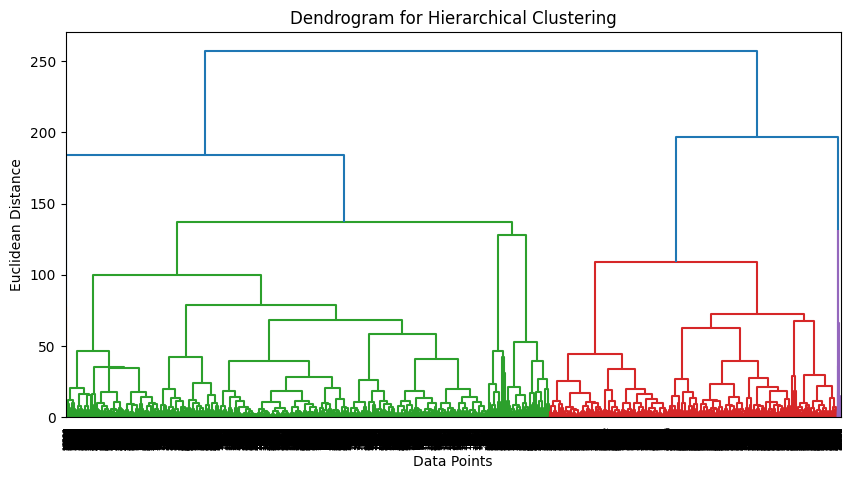

In [15]:
# Plot Dendrogram to determine optimal number of clusters
plt.figure(figsize=(10, 5))
linkage_matrix = sch.linkage(scaled_data, method='ward')  # Ward's method minimizes variance
sch.dendrogram(linkage_matrix)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

In [16]:
# Choose an appropriate number of clusters based on the dendrogram
optimal_k = 4  # Adjust based on dendrogram observation

In [18]:
# Apply Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
clusters = hc.fit_predict(scaled_data)

In [19]:
# Add cluster labels to the dataset
data['Cluster'] = clusters

In [20]:
# Cluster Interpretation: Feature Means per Cluster
cluster_means = data.groupby('Cluster').mean()
print("\nCluster Feature Means:\n", cluster_means)


Cluster Feature Means:
            MedInc   HouseAge   AveRooms  AveBedrms   Population    AveOccup  \
Cluster                                                                       
0        3.935994  28.192973   5.217788   1.065418  1537.071667    3.081337   
1        3.364109  18.786667  32.165032   6.735987   284.813333    2.502471   
2        3.764711  29.481158   5.522474   1.094074  1247.206155    2.753612   
3        6.669400  42.333333   5.795482   1.094628  6063.333333  781.836386   

          Latitude   Longitude  
Cluster                         
0        34.164741 -118.197095  
1        37.751467 -119.439333  
2        38.076698 -121.878005  
3        38.016667 -121.063333  


In [21]:
# PCA for Visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)


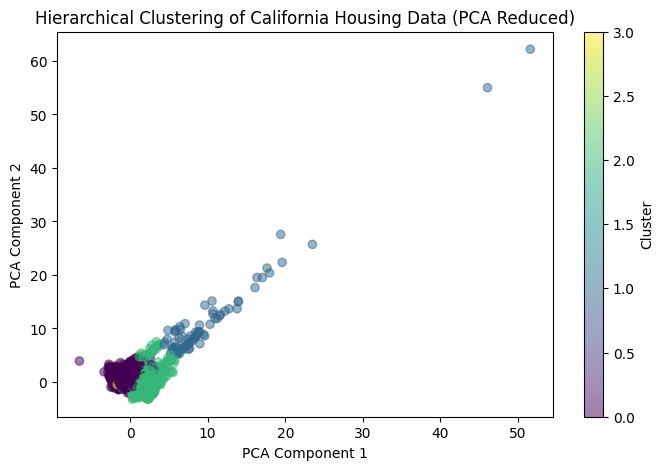

In [22]:
# Scatter plot of clusters
plt.figure(figsize=(8, 5))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Hierarchical Clustering of California Housing Data (PCA Reduced)')
plt.colorbar(label="Cluster")
plt.show()


# Density-Based Spatial Clustering (DBSCAN)

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [24]:
# Load California housing dataset
california = fetch_california_housing()
data = pd.DataFrame(california.data, columns=california.feature_names)
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [25]:
# Standardize the dataset
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [26]:
# Apply DBSCAN Clustering
dbscan = DBSCAN(eps=0.8, min_samples=10)  # Adjust eps and min_samples if needed
clusters = dbscan.fit_predict(scaled_data)

In [27]:
# Add cluster labels to dataset
data['Cluster'] = clusters

# Count unique clusters (-1 indicates noise/outliers)
cluster_counts = pd.Series(clusters).value_counts()
print("\nCluster Counts:\n", cluster_counts)


Cluster Counts:
  0    19702
-1      882
 2       34
 1       15
 3        7
Name: count, dtype: int64


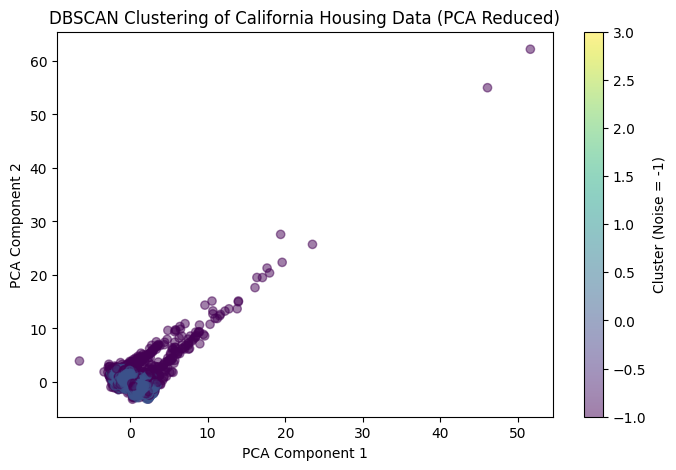

In [28]:
# PCA for Visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Scatter plot of clusters
plt.figure(figsize=(8, 5))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('DBSCAN Clustering of California Housing Data (PCA Reduced)')
plt.colorbar(label="Cluster (Noise = -1)")
plt.show()
